<a href="https://colab.research.google.com/github/MohammadNPak/MFTDjango04/blob/master/iris-Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

data = pd.DataFrame(
    data=np.concatenate([X,y.reshape((-1,1))],axis=1),
    columns=feature_names+['target']
    )[['sepal length (cm)','sepal width (cm)','target']]

data=data[data['target']!=2 ]

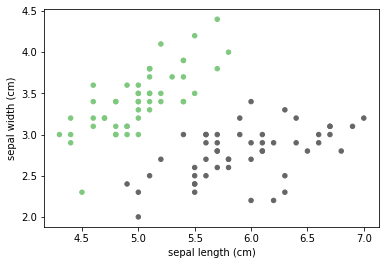

In [99]:
from matplotlib.cm import Accent

data.plot.scatter(
    x='sepal length (cm)',
    y='sepal width (cm)',
    c='target',
    colormap=Accent,
    colorbar=False)




Text(0.5, 1.0, 'loss')

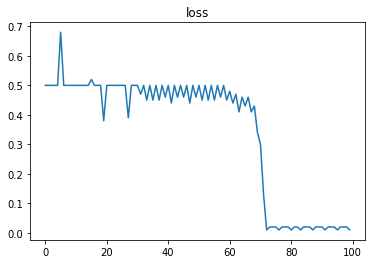

In [117]:
W=np.ones((3,1))
X = np.concatenate(
    [
        np.ones((len(data),1)),
        data[['sepal length (cm)','sepal width (cm)']]
    ],
     axis=1)

t = data['target'].to_numpy().reshape((-1,1))
lr=0.1
loss=[]
epochs = 100
for epoch in range(epochs):
  y = X@W>=0
  error = y.astype(float)-t
  W = W - lr*np.mean(X*error,axis=0).reshape((-1,1))
  mean_error=np.mean(np.power(error,2))
  if mean_error<0.01:
    break
  loss.append(mean_error)

plt.plot(np.array(loss))
plt.title('loss')

In [118]:
print(W)

[[ 0.617 ]
 [ 0.5601]
 [-1.1773]]


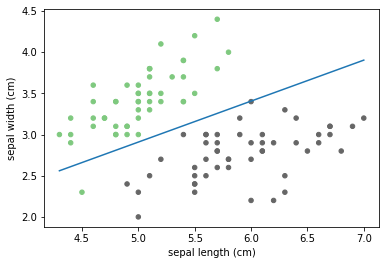

In [114]:
x = np.linspace(data['sepal length (cm)'].min(),data['sepal length (cm)'].max(),200)
y= (-W[0,0]-W[1,0]*x)/W[2,0]


data.plot.scatter(
    x='sepal length (cm)',
    y='sepal width (cm)',
    c='target',
    colormap=Accent,
    colorbar=False,
    )
plt.plot(x,y)
plt.show()